In [1]:
# Imports
# Gymnasium imports
import gymnasium as gym 
from gymnasium import Env
from gymnasium.spaces import Discrete, Box, Dict, Tuple, MultiBinary, MultiDiscrete 

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

# Import helpers
import numpy as np
import pandas as pd
import random
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

from collections import deque

# Import stable baselines
from stable_baselines3 import PPO, A2C
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_checker import check_env

# Import tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models

# Import custom classes
from Environment.env_v7 import *
from Functions.visualization_functions import *

# Import custom functions
from Functions.deep_q_learning import *

In [2]:
# Configuration of the network
with open('./Config/network_config_v0.json') as file:
    network_config = file.read()

EP_LENGTH = 52 # Length of the episode

Node Attributes:
Node A: {'type': 'manufacturer', 'I': 30}
Node B: {'type': 'manufacturer', 'I': 28}
Node C: {'type': 'manufacturer', 'I': 32}
Node D: {'type': 'distributor'}
Node S: {'type': 'source'}


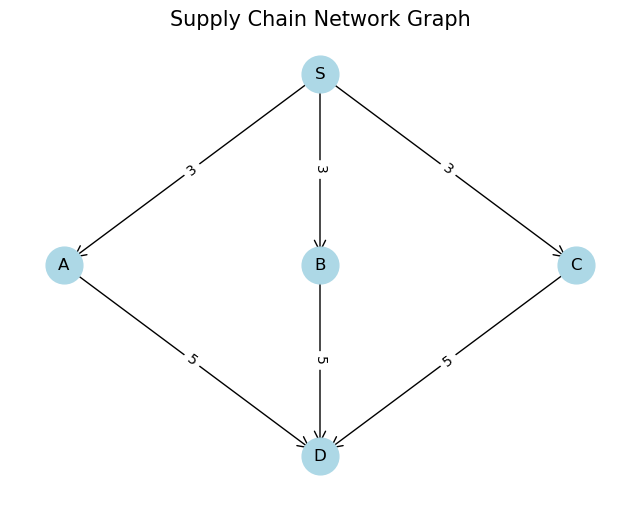

In [3]:
env = SS_Mngmt_Env(network_config=network_config,
                   EP_LENGTH=EP_LENGTH,
                   render_mode="human",
                   model_type="heuristic")

check_env(env, warn=True)

env.render_network()

In [4]:
episodes = 1

for episode in range(1, episodes+1):
    state = env.reset()[0]
    done = False
    score = 0 
    
    while not done:
        # Select action based on the stock (first 3 elements of n_state)
        stock = state[:3]

        action = [0, 0, 0]

        for i in range(3):
            if stock[i] > 50:
                action[i] = 0
            elif stock[i] <= 50 and stock[i] > 30:
                action[i] = 1
            else:
                action[i] = 2
        
        n_state, reward, done, info, _ = env.step(action)
        score += reward

        env.render()
        
        # Update state
        state = n_state

Episode Length: 1
Stock Level: [[23. 17. 32.]]
Planned Demand: [11. 10.  0.]
Actual Demand: [ 7. 11.  0.]
Action: [50, 50, 15]
Order: [0 0 0]
Reward: 0

Backlog:
{'A': deque([]), 'B': deque([]), 'C': deque([])}
Order Queue:
{   'A': deque([0, 0, 50], maxlen=3),
    'B': deque([0, 0, 50], maxlen=3),
    'C': deque([0, 0, 15], maxlen=3)}

Episode Length: 2
Stock Level: [[16. 17. 32.]]
Planned Demand: [8. 0. 0.]
Actual Demand: [7. 0. 0.]
Action: [50, 50, 15]
Order: [0 0 0]
Reward: 340.25

Backlog:
{'A': deque([]), 'B': deque([]), 'C': deque([])}
Order Queue:
{   'A': deque([0, 50, 50], maxlen=3),
    'B': deque([0, 50, 50], maxlen=3),
    'C': deque([0, 15, 15], maxlen=3)}

Episode Length: 3
Stock Level: [[16. 17. 22.]]
Planned Demand: [ 0.  0. 10.]
Actual Demand: [ 0.  0. 10.]
Action: [50, 50, 15]
Order: [0 0 0]
Reward: 120.6

Backlog:
{'A': deque([]), 'B': deque([]), 'C': deque([])}
Order Queue:
{   'A': deque([50, 50, 50], maxlen=3),
    'B': deque([50, 50, 50], maxlen=3),
    'C': deq

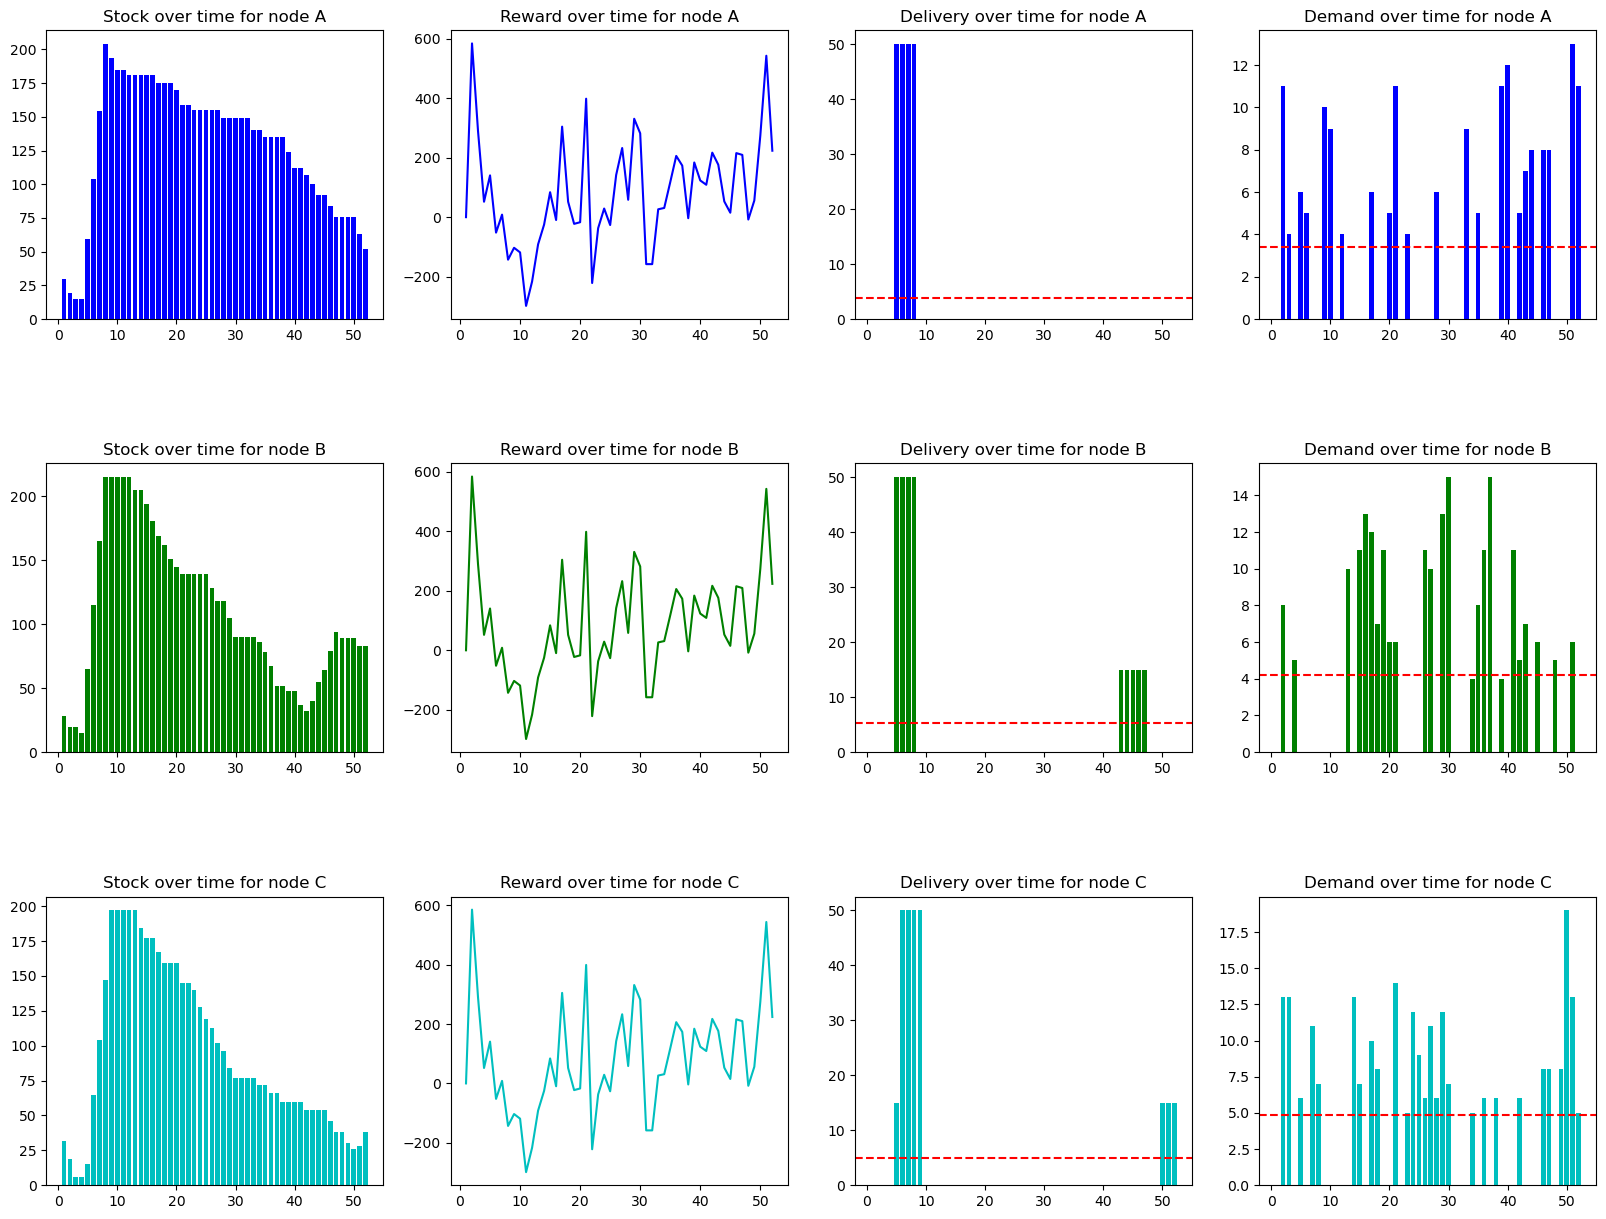

In [8]:
df = pd.read_csv('./Data/2024-11-04_20_last_environment_data_heuristic.csv')
plot_data(df)